In [150]:
import pandas as pd
import json

In [151]:
with open('../api_flats/api_flats/devices/phy-Bluetooth.json', 'r') as openfile:
    bt = json.load(openfile)

In [152]:
'''bt_df = pd.DataFrame()

for device in bt:    
    bt_data = {
        "key": [device['kismet.device.base.key']], 
        "device_name": [device['kismet.device.base.name']],
        "device_type": [device['kismet.device.base.type']],
        "num_packets": [device['kismet.device.base.packets.total']],
        "manuf": [device['kismet.device.base.manuf']], 
        "macaddr": [device['kismet.device.base.macaddr']],
        "channel": [device['kismet.device.base.channel']],
        "first_seen": [device['kismet.device.base.first_time']], 
        "last_seen": [device['kismet.device.base.last_time']],
        "server_uuid": [device['kismet.server.uuid']]
    }
    
    bt_df = pd.concat([bt_df, pd.DataFrame(bt_data)], ignore_index=True)'''

'bt_df = pd.DataFrame()\n\nfor device in bt:    \n    bt_data = {\n        "key": [device[\'kismet.device.base.key\']], \n        "device_name": [device[\'kismet.device.base.name\']],\n        "device_type": [device[\'kismet.device.base.type\']],\n        "num_packets": [device[\'kismet.device.base.packets.total\']],\n        "manuf": [device[\'kismet.device.base.manuf\']], \n        "macaddr": [device[\'kismet.device.base.macaddr\']],\n        "channel": [device[\'kismet.device.base.channel\']],\n        "first_seen": [device[\'kismet.device.base.first_time\']], \n        "last_seen": [device[\'kismet.device.base.last_time\']],\n        "server_uuid": [device[\'kismet.server.uuid\']]\n    }\n    \n    bt_df = pd.concat([bt_df, pd.DataFrame(bt_data)], ignore_index=True)'

In [153]:
import requests

user_password = "http://sniffer:sniffer@"
server_ip = "172.26.99.45:2501/"

# Retrieved from: 
# endpoint = "/devices/views/all_views.json"
bluetooth_VIEWID = "phy-Bluetooth"
accesspoints_VIEWID = "phydot11_accesspoints"
IEEE802_11_VIEWID = "phy-IEEE802.11"
all_VIEWID = "all"

VIEWID_list = [bluetooth_VIEWID]

for VIEWID in VIEWID_list:
    endpoint = f"/devices/views/{VIEWID}/devices.json"
    x = requests.get(user_password + server_ip + endpoint, headers={"KISMET": "E62F6C667B3CF269798AC58E0D811D85"})
    json_object = x.json()
    #json_object = json.dumps(x.json(), indent=4)

bt = json_object

In [154]:
len(bt_df)

2143

In [155]:
bt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   key          2143 non-null   object
 1   device_name  2143 non-null   object
 2   device_type  2143 non-null   object
 3   num_packets  2143 non-null   int64 
 4   manuf        2143 non-null   object
 5   macaddr      2143 non-null   object
 6   channel      2143 non-null   object
 7   first_seen   2143 non-null   int64 
 8   last_seen    2143 non-null   int64 
 9   server_uuid  2143 non-null   object
dtypes: int64(3), object(7)
memory usage: 167.5+ KB


device_type
BTLE      2140
BR/EDR       3
Name: count, dtype: int64


<Axes: xlabel='device_type'>

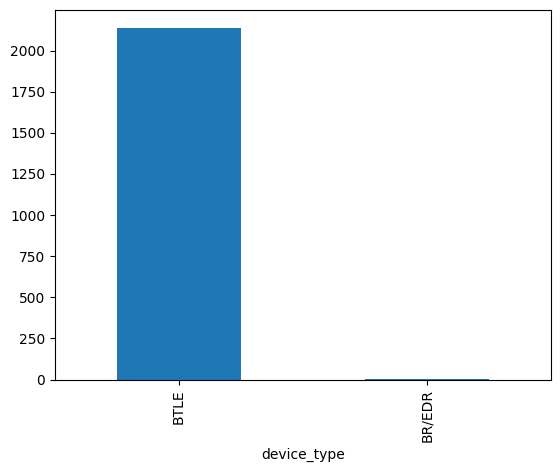

In [156]:
print(bt_df['device_type'].value_counts())
bt_df['device_type'].value_counts().plot(kind='bar')

In [157]:
bt_df[bt_df['device_type']=='BR/EDR']

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen,server_uuid
29,B603E01100000000_875EF77751E8,Casting Room TV,BR/EDR,909,Qingdao Intelligent & Precise Electronics Ltd,E8:51:77:F7:5E:87,FHSS,1682108902,1682162735,9B95B2B2-CF0F-11ED-A729-4B49534D4554
156,B603E01100000000_2A2ADE415116,The Fitness Earbuds,BR/EDR,1,Unknown,16:51:41:DE:2A:2A,FHSS,1682112166,1682112166,9B95B2B2-CF0F-11ED-A729-4B49534D4554
354,B603E01100000000_EB0EFFC058C8,DESKTOP-S1GDS2S,BR/EDR,774,Intel Corporation,C8:58:C0:FF:0E:EB,FHSS,1682117739,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554


In [158]:
print(bt_df[~bt_df["device_name"].str.contains(':', na=False)]['device_name'].value_counts())
print(bt_df[bt_df["device_name"].str.contains(':', na=False)]['device_name'].value_counts().sum())

device_name
Apple Pencil                 5
Govee_H610A_617D             1
Casting Room TV              1
LE-Bose Revolve SoundLink    1
OontZAngle3ShowerApp8D0      1
The Fitness Earbuds          1
Philips Sonicare             1
DESKTOP-S1GDS2S              1
Charge 4                     1
YamahaAV                     1
Name: count, dtype: int64
2129


In [159]:
bt_df[~bt_df["device_name"].str.contains(':', na=False)]

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen,server_uuid
9,B603E01100000000_7D61303832D2,Govee_H610A_617D,BTLE,1897,Unknown,D2:32:38:30:61:7D,FHSS,1682108806,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554
29,B603E01100000000_875EF77751E8,Casting Room TV,BR/EDR,909,Qingdao Intelligent & Precise Electronics Ltd,E8:51:77:F7:5E:87,FHSS,1682108902,1682162735,9B95B2B2-CF0F-11ED-A729-4B49534D4554
32,B603E01100000000_544786A51128,LE-Bose Revolve SoundLink,BTLE,911,Bose Corporation,28:11:A5:86:47:54,FHSS,1682108943,1682124828,9B95B2B2-CF0F-11ED-A729-4B49534D4554
135,B603E01100000000_D1D8046C2200,OontZAngle3ShowerApp8D0,BTLE,3,LinkSprite Technologies Inc.,00:22:6C:04:D8:D1,FHSS,1682111595,1682111614,9B95B2B2-CF0F-11ED-A729-4B49534D4554
143,B603E01100000000_4D75242C0C78,Apple Pencil,BTLE,1,Unknown,78:0C:2C:24:75:4D,FHSS,1682111838,1682111838,9B95B2B2-CF0F-11ED-A729-4B49534D4554
156,B603E01100000000_2A2ADE415116,The Fitness Earbuds,BR/EDR,1,Unknown,16:51:41:DE:2A:2A,FHSS,1682112166,1682112166,9B95B2B2-CF0F-11ED-A729-4B49534D4554
157,B603E01100000000_A816A6AAE524,Philips Sonicare,BTLE,5,Philips Oral Healthcare Inc.,24:E5:AA:A6:16:A8,FHSS,1682112213,1682142326,9B95B2B2-CF0F-11ED-A729-4B49534D4554
185,B603E01100000000_7231E20F746C,Apple Pencil,BTLE,1,Unknown,6C:74:0F:E2:31:72,FHSS,1682113053,1682113053,9B95B2B2-CF0F-11ED-A729-4B49534D4554
354,B603E01100000000_EB0EFFC058C8,DESKTOP-S1GDS2S,BR/EDR,774,Intel Corporation,C8:58:C0:FF:0E:EB,FHSS,1682117739,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554
621,B603E01100000000_FB655A8781D0,Charge 4,BTLE,37,Unknown,D0:81:87:5A:65:FB,FHSS,1682125911,1682162310,9B95B2B2-CF0F-11ED-A729-4B49534D4554


In [160]:
print(bt_df['channel'].value_counts())

channel
FHSS    2143
Name: count, dtype: int64


manuf
Unknown                                          2133
Apple                                               3
Qingdao Intelligent & Precise Electronics Ltd       1
Bose Corporation                                    1
LinkSprite Technologies Inc.                        1
Philips Oral Healthcare Inc.                        1
Intel Corporation                                   1
PT. Hartono Istana Teknologi                        1
Beautiful Enterprise Ltd                            1
Name: count, dtype: int64


<Axes: ylabel='count'>

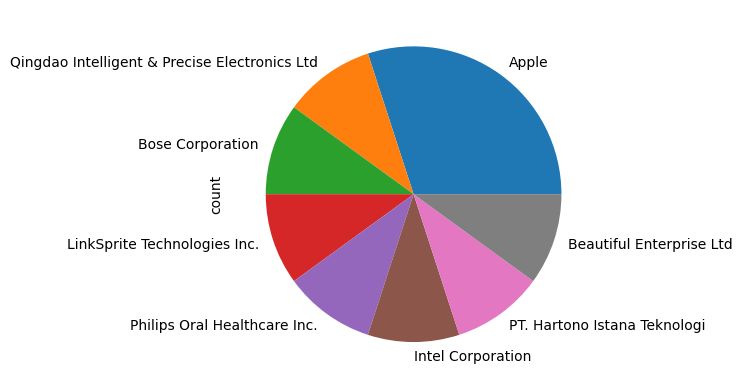

In [161]:
print(bt_df['manuf'].value_counts())
bt_df[~bt_df["manuf"].str.contains('Unknown', na=False)]['manuf'].value_counts().plot(kind='pie')

In [162]:
bt_df[~bt_df["manuf"].str.contains('Unknown', na=False)]

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen,server_uuid
29,B603E01100000000_875EF77751E8,Casting Room TV,BR/EDR,909,Qingdao Intelligent & Precise Electronics Ltd,E8:51:77:F7:5E:87,FHSS,1682108902,1682162735,9B95B2B2-CF0F-11ED-A729-4B49534D4554
32,B603E01100000000_544786A51128,LE-Bose Revolve SoundLink,BTLE,911,Bose Corporation,28:11:A5:86:47:54,FHSS,1682108943,1682124828,9B95B2B2-CF0F-11ED-A729-4B49534D4554
69,B603E01100000000_49826D04A9DC,DC:A9:04:6D:82:49,BTLE,1,Apple,DC:A9:04:6D:82:49,FHSS,1682109707,1682109707,9B95B2B2-CF0F-11ED-A729-4B49534D4554
135,B603E01100000000_D1D8046C2200,OontZAngle3ShowerApp8D0,BTLE,3,LinkSprite Technologies Inc.,00:22:6C:04:D8:D1,FHSS,1682111595,1682111614,9B95B2B2-CF0F-11ED-A729-4B49534D4554
157,B603E01100000000_A816A6AAE524,Philips Sonicare,BTLE,5,Philips Oral Healthcare Inc.,24:E5:AA:A6:16:A8,FHSS,1682112213,1682142326,9B95B2B2-CF0F-11ED-A729-4B49534D4554
222,B603E01100000000_D5AF8B0A4698,98:46:0A:8B:AF:D5,BTLE,11,Apple,98:46:0A:8B:AF:D5,FHSS,1682113997,1682146213,9B95B2B2-CF0F-11ED-A729-4B49534D4554
354,B603E01100000000_EB0EFFC058C8,DESKTOP-S1GDS2S,BR/EDR,774,Intel Corporation,C8:58:C0:FF:0E:EB,FHSS,1682117739,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554
444,B603E01100000000_E676669A8174,74:81:9A:66:76:E6,BTLE,47,PT. Hartono Istana Teknologi,74:81:9A:66:76:E6,FHSS,1682119856,1682120381,9B95B2B2-CF0F-11ED-A729-4B49534D4554
627,B603E01100000000_2FAF22257C34,34:7C:25:22:AF:2F,BTLE,7,Apple,34:7C:25:22:AF:2F,FHSS,1682126038,1682127065,9B95B2B2-CF0F-11ED-A729-4B49534D4554
939,B603E01100000000_367D534784C8,YamahaAV,BTLE,3,Beautiful Enterprise Ltd,C8:84:47:53:7D:36,FHSS,1682131728,1682135399,9B95B2B2-CF0F-11ED-A729-4B49534D4554


<Axes: >

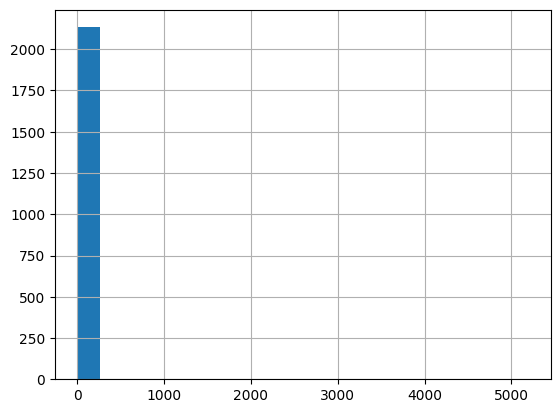

In [163]:
bt_df['num_packets'].hist(bins=20)


<Axes: >

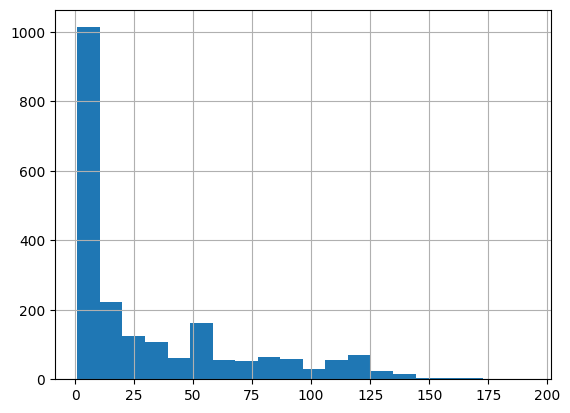

In [164]:
bt_df[bt_df['num_packets']<200]['num_packets'].hist(bins=20)

In [165]:
bt_df[bt_df['num_packets']>200]

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen,server_uuid
2,B603E01100000000_A14CBCF5ACA,CA:5A:CF:CB:14:0A,BTLE,5194,Unknown,CA:5A:CF:CB:14:0A,FHSS,1682108801,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554
4,B603E01100000000_472F95511F16,16:1F:51:95:2F:47,BTLE,919,Unknown,16:1F:51:95:2F:47,FHSS,1682108801,1682118436,9B95B2B2-CF0F-11ED-A729-4B49534D4554
6,B603E01100000000_F287F543C4C8,C8:C4:43:F5:87:F2,BTLE,4889,Unknown,C8:C4:43:F5:87:F2,FHSS,1682108802,1682162752,9B95B2B2-CF0F-11ED-A729-4B49534D4554
9,B603E01100000000_7D61303832D2,Govee_H610A_617D,BTLE,1897,Unknown,D2:32:38:30:61:7D,FHSS,1682108806,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554
12,B603E01100000000_919F1EB980EE,EE:80:B9:1E:9F:91,BTLE,2519,Unknown,EE:80:B9:1E:9F:91,FHSS,1682108874,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554
29,B603E01100000000_875EF77751E8,Casting Room TV,BR/EDR,909,Qingdao Intelligent & Precise Electronics Ltd,E8:51:77:F7:5E:87,FHSS,1682108902,1682162735,9B95B2B2-CF0F-11ED-A729-4B49534D4554
32,B603E01100000000_544786A51128,LE-Bose Revolve SoundLink,BTLE,911,Bose Corporation,28:11:A5:86:47:54,FHSS,1682108943,1682124828,9B95B2B2-CF0F-11ED-A729-4B49534D4554
354,B603E01100000000_EB0EFFC058C8,DESKTOP-S1GDS2S,BR/EDR,774,Intel Corporation,C8:58:C0:FF:0E:EB,FHSS,1682117739,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554
421,B603E01100000000_E5FA88D1FB22,22:FB:D1:88:FA:E5,BTLE,4125,Unknown,22:FB:D1:88:FA:E5,FHSS,1682119475,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554
1037,B603E01100000000_CC9F8E220CC0,C0:0C:22:8E:9F:CC,BTLE,463,Unknown,C0:0C:22:8E:9F:CC,FHSS,1682133646,1682142745,9B95B2B2-CF0F-11ED-A729-4B49534D4554


In [166]:
time_data = bt_df.copy()
diff = time_data['last_seen'] - time_data['first_seen']
hours = diff / 3600
time_data['time_between (hours)'] = hours

<Axes: xlabel='time_between (hours)', ylabel='num_packets'>

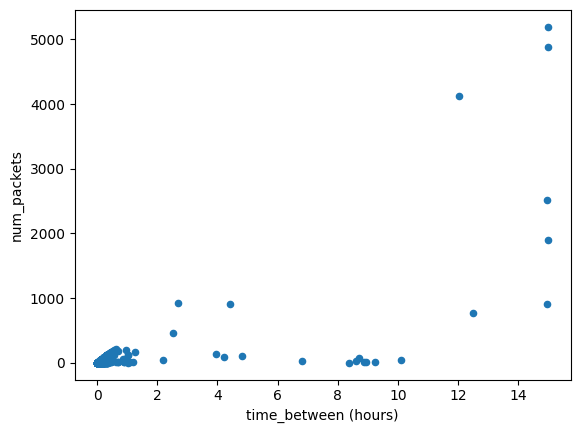

In [167]:
time_data.plot.scatter('time_between (hours)', 'num_packets')

In [168]:
time_data[time_data['time_between (hours)']>14]

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen,server_uuid,time_between (hours)
2,B603E01100000000_A14CBCF5ACA,CA:5A:CF:CB:14:0A,BTLE,5194,Unknown,CA:5A:CF:CB:14:0A,FHSS,1682108801,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554,14.988889
6,B603E01100000000_F287F543C4C8,C8:C4:43:F5:87:F2,BTLE,4889,Unknown,C8:C4:43:F5:87:F2,FHSS,1682108802,1682162752,9B95B2B2-CF0F-11ED-A729-4B49534D4554,14.986111
9,B603E01100000000_7D61303832D2,Govee_H610A_617D,BTLE,1897,Unknown,D2:32:38:30:61:7D,FHSS,1682108806,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554,14.987500
12,B603E01100000000_919F1EB980EE,EE:80:B9:1E:9F:91,BTLE,2519,Unknown,EE:80:B9:1E:9F:91,FHSS,1682108874,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554,14.968611
29,B603E01100000000_875EF77751E8,Casting Room TV,BR/EDR,909,Qingdao Intelligent & Precise Electronics Ltd,E8:51:77:F7:5E:87,FHSS,1682108902,1682162735,9B95B2B2-CF0F-11ED-A729-4B49534D4554,14.953611


<Axes: xlabel='time_between (hours)', ylabel='num_packets'>

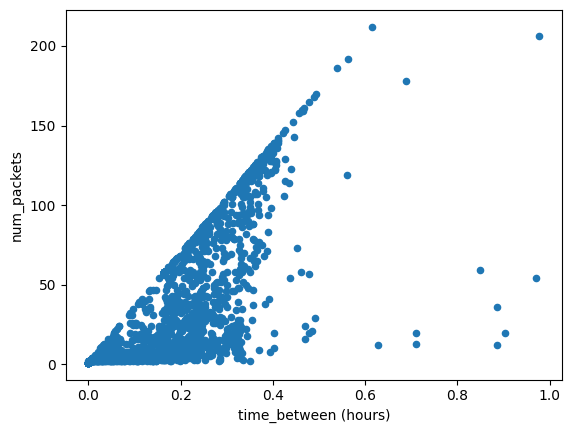

In [169]:
time_data[time_data['time_between (hours)']<1].plot.scatter('time_between (hours)', 'num_packets')

In [170]:
time_data[time_data['time_between (hours)']>0.8]

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen,server_uuid,time_between (hours)
2,B603E01100000000_A14CBCF5ACA,CA:5A:CF:CB:14:0A,BTLE,5194,Unknown,CA:5A:CF:CB:14:0A,FHSS,1682108801,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554,14.988889
4,B603E01100000000_472F95511F16,16:1F:51:95:2F:47,BTLE,919,Unknown,16:1F:51:95:2F:47,FHSS,1682108801,1682118436,9B95B2B2-CF0F-11ED-A729-4B49534D4554,2.676389
6,B603E01100000000_F287F543C4C8,C8:C4:43:F5:87:F2,BTLE,4889,Unknown,C8:C4:43:F5:87:F2,FHSS,1682108802,1682162752,9B95B2B2-CF0F-11ED-A729-4B49534D4554,14.986111
9,B603E01100000000_7D61303832D2,Govee_H610A_617D,BTLE,1897,Unknown,D2:32:38:30:61:7D,FHSS,1682108806,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554,14.987500
12,B603E01100000000_919F1EB980EE,EE:80:B9:1E:9F:91,BTLE,2519,Unknown,EE:80:B9:1E:9F:91,FHSS,1682108874,1682162761,9B95B2B2-CF0F-11ED-A729-4B49534D4554,14.968611
29,B603E01100000000_875EF77751E8,Casting Room TV,BR/EDR,909,Qingdao Intelligent & Precise Electronics Ltd,E8:51:77:F7:5E:87,FHSS,1682108902,1682162735,9B95B2B2-CF0F-11ED-A729-4B49534D4554,14.953611
32,B603E01100000000_544786A51128,LE-Bose Revolve SoundLink,BTLE,911,Bose Corporation,28:11:A5:86:47:54,FHSS,1682108943,1682124828,9B95B2B2-CF0F-11ED-A729-4B49534D4554,4.412500
50,B603E01100000000_1184B4E87740,40:77:E8:B4:84:11,BTLE,143,Unknown,40:77:E8:B4:84:11,FHSS,1682109242,1682123516,9B95B2B2-CF0F-11ED-A729-4B49534D4554,3.965000
94,B603E01100000000_74AF8D42566B,6B:56:42:8D:AF:74,BTLE,33,Unknown,6B:56:42:8D:AF:74,FHSS,1682110261,1682134773,9B95B2B2-CF0F-11ED-A729-4B49534D4554,6.808889
151,B603E01100000000_F6D03F0BA43F,3F:A4:0B:3F:D0:F6,BTLE,109,Unknown,3F:A4:0B:3F:D0:F6,FHSS,1682112076,1682129447,9B95B2B2-CF0F-11ED-A729-4B49534D4554,4.825278
